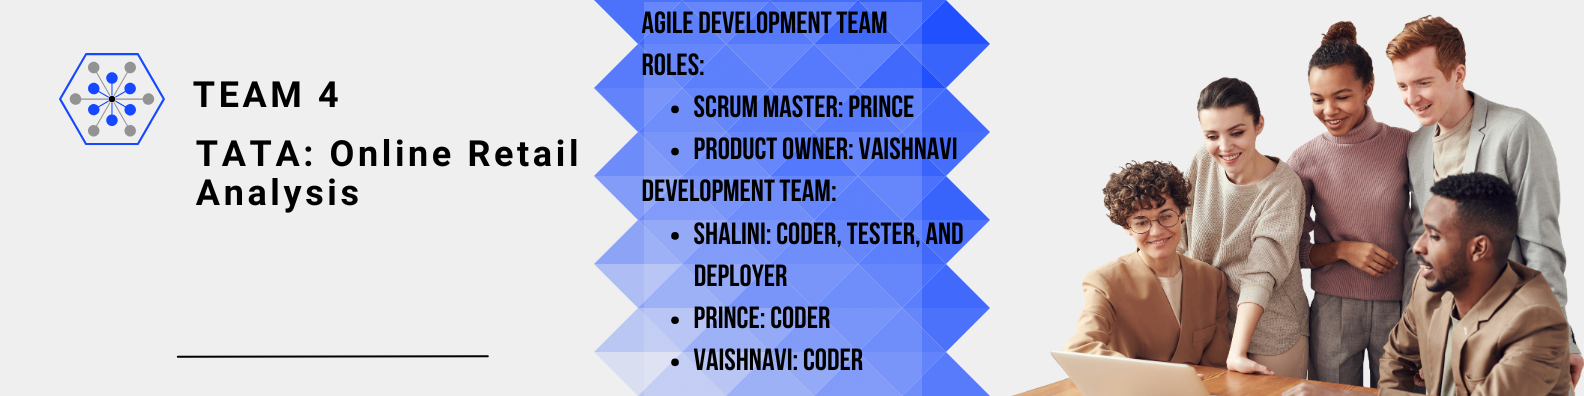

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Table of Contents</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            line-height: 1.6;
        }
        .toc-container {
            max-width: 600px;
            margin: 0 auto;
            padding: 20px;
            border: 1px solid #ddd;
            border-radius: 10px;
            background-color: #f9f9f9;
        }
        .toc-title {
            text-align: center;
            font-size: 1.5em;
            font-weight: bold;
            margin-bottom: 20px;
        }
        .toc-list {
            list-style-type: none;
            padding: 0;
        }
        .toc-list li {
            margin: 10px 0;
        }
        .toc-list a {
            text-decoration: none;
            color: #007bff;
            font-weight: bold;
        }
        .toc-list a:hover {
            text-decoration: underline;
            color: #0056b3;
        }
    </style>
</head>
<body>
    <div class="toc-container">
        <div class="toc-title"></div>
        <ul class="toc-list">
            <li><a href="#introduction">1. Introduction</a></li>
            <li><a href="#problem-statement">2. Problem Statement</a></li>
            <li><a href="#need-for-study">3. Need for the Study</a></li>
            <li><a href="#business-opportunity">4. Understanding the Business Opportunity</a></li>
            <li><a href="#data-preparation">5. Data Preparation</a></li>
            <li><a href="#data-understanding">6. Understanding the Data</a></li>
            <li><a href="#data-cleaning">7. Data Cleaning and Preprocessing</a></li>
            <li><a href="#eda">8. Exploratory Data Analysis (EDA)</a></li>
        </ul>
    </div>
</body>
</html>


# Introduction of the business Problem
## Problem statement:
### Optimizing Revenue and Strategic Decision-Making for an Online Retail Store

## Need of the study/project
### The online retail store seeks to leverage its data to evaluate current business performance and plan strategically for sustainable growth. The objectives include:

#### Revenue Drivers Analysis: 
##### Identifying product categories, customer segments, sales channels, and geographic regions contributing the most to revenue.
#### Marketing Effectiveness Assessment: 
##### Evaluating customer acquisition, retention, and engagement metrics to optimize resource allocation.
#### Demographic-Based Insights: 
##### Understanding customer demographics (age, gender, location, and behavior) to inform personalized marketing strategies.
#### The goal is to provide actionable insights and recommendations for enhancing operational efficiency, marketing effectiveness, and demographic-specific targeting to support strategic expansion and maximize revenue. The findings will establish a data-driven foundation for long-term growth.

### Understanding the Business Opportunity
#### The online retail store has the potential to boost growth through data-driven insights. By identifying top revenue drivers, optimizing marketing strategies, and analyzing customer demographics, the business can focus on high-performing areas and target specific segments effectively. Strategic expansion into profitable markets and improved customer retention can ensure sustained growth and a competitive edge in the dynamic online retail landscape.

# Import neccessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## load dataset (using API)

In [ ]:
import kagglehub

kagglehub.login()
# {"username":"princejaniya","key":"c2e1f83d0b07f5a939121b876f78d584"}

In [ ]:
path = kagglehub.dataset_download("ishanshrivastava28/tata-online-retail-dataset",force_download=True)
print("Path to dataset files:",path)

In [ ]:
    Data = pd.read_csv(r"C:\Users\Prince\.cache\kagglehub\datasets\ishanshrivastava28\tata-online-retail-dataset\versions\1\Online Retail Data Set.csv",encoding='latin1')
Data.head()

# Data Dictionary

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">
Define your data fields:

1.InvoiceNo: Unique invoice number.

2.StockCode: Unique product identifier.

3.Description: Product description.

4.Quantity: Number of items sold.

5.InvoiceDate: Date and time of invoice.

6.UnitPrice: Price per item.

7.CustomerID: Unique customer identifier.

8.Country: Country of purchase.</span>


# Undestanding data

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000000;">Check the Dimension of data?

In [ ]:
Data.shape # see the shape of the data

**There are 541909 Observations / Rows and 8 Attributes / Columns.**

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Check the Information about the data and the datatypes of each respective attributes.</span>


In [ ]:
Data.columns

In [ ]:
Data.info()

* Our dataset is composed of 541909 rows and 8 columns. When going through the columns, we notice that we have some missing values in the CustomerID column, as it only has 406829 values. Also the column Description has missing values. So, that should be considered when applying exploration to our dataset. 

# LET'S DEAL WITH THE DUPLICATES AND THE MISSING VALUES OR NAN VALUES

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Checking for missing values.</span>


In [ ]:
Data.isnull().sum()

*There are 1454 and 135080 missing values in Description and CustomerID columns respectively.*

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Handling the missing values</span>

imputing description based on stock code

In [ ]:
description_impute = Data.groupby('StockCode')['Description'].apply(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Item")
Data['Description'] = Data.apply(lambda row: description_impute[row['StockCode']] if pd.isnull(row['Description']) else row['Description'], axis=1)

In [ ]:
description_impute
#Groups the Data DataFrame by the StockCode column and selects
#the Description column for each group.

In [ ]:
Data['Description'] 

retaining customer id

In [ ]:
Data['CustomerID'] = Data['CustomerID'].fillna(0)

In [ ]:
print("\nMissing values after handling:")
print(Data.isnull().sum())

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Identify and count duplicate rows in the dataset</span>

In [ ]:
duplicate_rows = Data[Data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(duplicate_rows.head())

Check Duplicates Based on Specific Columns (e.g.,InvoiceNo,StockCode)

In [ ]:
# Check for duplicate rows based on specific columns
subset_duplicates = Data[Data.duplicated(subset=['InvoiceNo', 'StockCode'])]
print(f"Number of duplicate rows based on InvoiceNo and StockCode: {subset_duplicates.shape[0]}")
print(subset_duplicates.head())


 Flag Duplicate Rows

In [ ]:
Data['is_duplicate'] = Data.duplicated(keep=False)
print(Data[Data['is_duplicate']].head())

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Removing Duplicate Rows</span>

Remove duplicate rows while retaining the first or last occurrence

In [ ]:
Data_cleaned = Data.drop_duplicates()

In [ ]:
Data_cleaned = Data.drop_duplicates(keep='last')

Drop duplicates based on specific columns

In [ ]:
Data_cleaned = Data.drop_duplicates(subset=['InvoiceNo', 'StockCode'])

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Aggregate and Handle Duplicates</span>

Group by duplicate identifiers and aggregate

In [ ]:
Data_cleaned = Data.groupby(['InvoiceNo', 'StockCode'], as_index=False).agg({
    'Quantity': 'sum',        # Sum quantities for duplicates
    'UnitPrice': 'mean',      # Take average price
    'Description': 'first',   # Retain the first description
    'CustomerID': 'first',    # Retain the first customer ID
    'Country': 'first'        # Retain the first country
})

Recheck Remaining Duplicates

In [ ]:
remaining_duplicates = Data_cleaned[Data_cleaned.duplicated()]
print(f"Number of remaining duplicate rows: {remaining_duplicates.shape[0]}")
print(remaining_duplicates.head())

Verify

In [ ]:
print(f"Number of duplicate rows after final cleanup: {Data_cleaned.duplicated().sum()}")

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Separating categorical and numerical columns</span>

In [ ]:
categorical_cols = Data.select_dtypes(include='object').columns
numerical_cols = Data.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Extracting Date and Time Components from InvoiceDate</span>

Convert 'InvoiceDate' to datetime

In [ ]:
Data['InvoiceDate'] = pd.to_datetime(Data['InvoiceDate'], format='%d-%m-%Y %H:%M')

Extract date and time components

In [ ]:
Data['Month'] = Data['InvoiceDate'].dt.month_name()  # Month name
Data['Day'] = Data['InvoiceDate'].dt.day_name()      # Day name
Data['Year'] = Data['InvoiceDate'].dt.year           # Year
Data['Time'] = Data['InvoiceDate'].dt.time           # Time

Accoding to the problem statement we need to derive more column to get a better perspective of the data

In [ ]:
Data['Total_sales'] = Data['Quantity'] * Data['UnitPrice']

In [ ]:
# 1. Total Revenue
Data['TotalRevenue'] = Data['Quantity'] * Data['UnitPrice']
# 2. Month and Year
Data['InvoiceDate'] = pd.to_datetime(Data['InvoiceDate'])
Data['Month'] = Data['InvoiceDate'].dt.month
Data['Year'] = Data['InvoiceDate'].dt.year
# 3. Day of Week
Data['DayOfWeek'] = Data['InvoiceDate'].dt.day_name()
# 4. Customer Segment (based on frequency)
customer_frequency = Data.groupby('CustomerID')['InvoiceNo'].nunique()
Data['CustomerSegment'] = Data['CustomerID'].map(
    lambda x: 'Frequent' if customer_frequency[x] > 10 else 
              'Regular' if customer_frequency[x] > 5 else 
              'New'
)
# 5. Revenue per Invoice
invoice_revenue = Data.groupby('InvoiceNo')['TotalRevenue'].sum()
Data['RevenuePerInvoice'] = Data['InvoiceNo'].map(invoice_revenue)
# 6. Geographic Insights
country_revenue = Data.groupby('Country')['TotalRevenue'].sum().reset_index()
country_revenue.columns = ['Country', 'CountryTotalRevenue']
# Merge with original Data
Data = Data.merge(country_revenue, on='Country', how='left')
# 7. Product Category (basic keyword grouping in 'Description')
def get_category(description):
    if 'HEART' in description:
        return 'Home Decor'
    elif 'LANTERN' in description:
        return 'Lighting'
    else:
        return 'Other'
Data['ProductCategory'] = Data['Description'].apply(get_category)
# 8. Order Size
def categorize_order_size(quantity):
    if quantity > 10:
        return 'Large'
    elif quantity > 5:
        return 'Medium'
    else:
        return 'Small'
Data['OrderSize'] = Data['Quantity'].apply(categorize_order_size)
# Save the enhanced dataset
Data.to_csv('enhanced_dataset.csv', index=False)

In [ ]:
Data.head()

# Data Dictionary for Derived Columns

| **Column Name**       | **Data Type** | **Description**                                                                                                                                    | **Example**                 |
|------------------------|---------------|----------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------|
| **TotalRevenue**       | Float         | The total revenue generated per line item, calculated as `Quantity * UnitPrice`.                                                                   | `15.30` (6 * 2.55)         |
| **Month**              | Integer       | The month extracted from the `InvoiceDate`, representing when the transaction occurred.                                                            | `12` (for December)         |
| **Year**               | Integer       | The year extracted from the `InvoiceDate`, representing when the transaction occurred.                                                             | `2010`                      |
| **DayOfWeek**          | String        | The day of the week extracted from `InvoiceDate`, indicating the transaction day.                                                                  | `Monday`                    |
| **CustomerSegment**    | String        | Segments customers based on purchase frequency: `Frequent`, `Regular`, or `New`. Derived from the number of unique invoices associated with a customer.| `Frequent`                  |
| **RevenuePerInvoice**  | Float         | The total revenue generated per invoice, summing up all line items with the same `InvoiceNo`.                                                      | `45.27`                     |
| **CountryTotalRevenue**| Float         | The total revenue generated from all transactions in a specific `Country`.                                                                         | `1200.00`                   |
| **ProductCategory**    | String        | Categorizes products based on keywords in `Description`. Categories include `Home Decor`, `Lighting`, and `Other`.                                 | `Home Decor`                |
| **OrderSize**          | String        | Categorizes orders based on the `Quantity` purchased: `Small` (1–5), `Medium` (6–10), or `Large` (11+).                                            | `Medium`                    |


# EDA 

# Outlier Detection (Boxplot)

In [ ]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust subplot dimensions as needed
    sns.boxplot(x=Data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Boxplots are used to detect outliers in each numerical column. Outliers are values that fall outside the "whiskers" of the boxplot and are potential data anomalies. This helps identify variables that might need further cleaning or transformation.

The Interquartile Range (IQR) is used to define the range within which most of the data points are expected to lie. Anything outside the lower and upper bounds (calculated using 1.5 * IQR) is considered an outlier. This step ensures outliers are objectively identified based on statistical boundaries

In [ ]:
Q1 = Data[numerical_cols].quantile(0.25)
Q3 = Data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Impute Outliers by Clipping

Clipping outliers means setting extreme values to the boundary values, which helps in making the dataset more consistent without removing potentially valuable data points. Clipping is a form of imputation for outliers, ensuring they don't disproportionately affect the analysis.

In [ ]:
Data_cleaned = Data.copy()
for col in numerical_cols:
    Data_cleaned[col] = Data_cleaned[col].clip(lower=lower_bound[col], upper=upper_bound[col])


# Verify the Clipping

 After clipping the outliers, it’s essential to visually verify if the extreme values have been successfully removed or transformed. The boxplot will show if the clipping process has worked as expected, with no values outside the defined bounds.

In [ ]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=Data_cleaned[col])
    plt.title(f'Boxplot of {col} (Clipped)')
plt.tight_layout()
plt.show()


## Descriptive statistics

In [ ]:
Data.describe()

# Creating histograms to visualize the mean, median, and mode summaries.

In [ ]:
# Creating a DataFrame with the given data
data_dict = {
    "Quantity": {"count": 541909, "mean": 9.552250, "std": 218.081158, "min": -80995, "25%": 1, "50%": 3, "75%": 10, "max": 80995},
    "UnitPrice": {"count": 541909, "mean": 4.611114, "std": 96.759853, "min": -11062.06, "25%": 1.25, "50%": 2.08, "75%": 4.13, "max": 38970},
    "Total_sales": {"count": 541909, "mean": 17.987795, "std": 378.810824, "min": -168469.6, "25%": 3.4, "50%": 9.75, "75%": 17.4, "max": 168469.6},
    "TotalRevenue": {"count": 541909, "mean": 17.987795, "std": 378.810824, "min": -168469.6, "25%": 3.4, "50%": 9.75, "75%": 17.4, "max": 168469.6},
    "RevenuePerInvoice": {"count": 541909, "mean": 1339.322767, "std": 2369.535149, "min": -168469.6, "25%": 287.1, "50%": 514.13, "75%": 1435.18, "max": 168469.6},
    "Hour": {"count": 541909, "mean": 13.078729, "std": 2.443270, "min": 6, "25%": 11, "50%": 13, "75%": 15, "max": 20},
}
data = pd.DataFrame(data_dict)
# Selecting appropriate columns for analysis
columns_to_plot = ['Quantity', 'UnitPrice', 'Total_sales', 'RevenuePerInvoice']
# Creating histograms for mean, median, and mode
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)
    # Extracting statistics for the column
    mean_value = data[col]['mean']
    median_value = data[col]['50%']
    mode_value = data[col][['25%', '50%', '75%']].median()  # Approximation of mode using central values
    # Creating histogram
    values = np.random.normal(loc=mean_value, scale=data[col]['std'], size=int(data[col]['count']))
    plt.hist(values, bins=30, alpha=0.7, label='Data Distribution', color='skyblue')    
    # Adding mean, median, and mode as vertical lines
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Mode')    
    # Setting labels and title
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

# Sample data dictionary for creating DataFrame
data_dict = {
    "Quantity": {"count": 541909, "mean": 9.552250, "std": 218.081158, "min": -80995, "25%": 1, "50%": 3, "75%": 10, "max": 80995},
    "UnitPrice": {"count": 541909, "mean": 4.611114, "std": 96.759853, "min": -11062.06, "25%": 1.25, "50%": 2.08, "75%": 4.13, "max": 38970},
    "Total_sales": {"count": 541909, "mean": 17.987795, "std": 378.810824, "min": -168469.6, "25%": 3.4, "50%": 9.75, "75%": 17.4, "max": 168469.6},
    "TotalRevenue": {"count": 541909, "mean": 17.987795, "std": 378.810824, "min": -168469.6, "25%": 3.4, "50%": 9.75, "75%": 17.4, "max": 168469.6},
    "RevenuePerInvoice": {"count": 541909, "mean": 1339.322767, "std": 2369.535149, "min": -168469.6, "25%": 287.1, "50%": 514.13, "75%": 1435.18, "max": 168469.6},
    "Hour": {"count": 541909, "mean": 13.078729, "std": 2.443270, "min": 6, "25%": 11, "50%": 13, "75%": 15, "max": 20},
}

# Creating a DataFrame
data = pd.DataFrame(data_dict)

# Selecting the columns for analysis
columns_to_plot = ['Quantity', 'UnitPrice', 'Total_sales', 'RevenuePerInvoice']

# Plotting histograms for mean, median, and mode in one figure
plt.figure(figsize=(10, 6))

# Loop through columns to plot histograms
for col in columns_to_plot:
    # Extracting statistics
    mean_value = data[col]['mean']
    median_value = data[col]['50%']
    mode_value = data[col][['25%', '50%', '75%']].median()  # Using middle value as a proxy for mode
    
    # Creating a normal distribution approximation for visualization
    values = np.random.normal(loc=mean_value, scale=data[col]['std'], size=int(data[col]['count']))

    # Plotting histogram
    plt.hist(values, bins=30, alpha=0.5, label=f'{col} Distribution', edgecolor='black')

    # Adding lines for mean, median, and mode
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'{col} Mean')
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'{col} Median')
    plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label=f'{col} Mode')

# Adding titles and labels
plt.title("Histograms for Quantity, UnitPrice, Total_sales, and RevenuePerInvoice")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend(loc='upper right')

# Display the plot
plt.show()


### Insights:
- **Quantity**: Most items are sold in small quantities, but a few items are sold in large quantities. The distribution is right-skewed.
- **UnitPrice**: Prices are generally low, with a few high-priced items. The distribution shows a right-skew.
- **Total Sales**: Sales follow a similar pattern to UnitPrice, with a few items contributing to higher sales.
- **Revenue Per Invoice**: Most invoices generate low revenue, but a small number generate significantly higher revenue.

### Recommendations:
- **Focus on High-Volume Products**: Identify and promote products with high quantities sold to boost sales.
- **Price Optimization**: Explore pricing strategies for higher-priced products to increase revenue.
- **Target High-Value Customers**: Focus on customers who generate the most revenue per invoice.
- **Enhance Product Offerings**: Consider introducing more high-value products to increase overall revenue.


# Total Sales by Country (Plotly)

This plot provides a distribution of total sales by country, offering insight into which countries contribute most to sales. It helps identify key markets and regions where business performance may vary

In [ ]:
import plotly.express as px 
# Ensure Total_sales is calculated
Data['Total_sales'] = Data['Quantity'] * Data['UnitPrice']
fig = px.histogram(Data, x="Total_sales",y='Country')
fig.update_layout(  
    title="Histogram of Sales country wise ",
    xaxis_title="Total_sales", 
    yaxis_title="Country",  
)


fig.show()

## Insights:
The United Kingdom has the highest total sales, significantly outperforming all other countries.
Other countries, such as Netherlands, EIRE, and Poland, show minimal contributions to total sales.
## Recommendations:
Focus more resources (marketing, inventory, and customer engagement) in the UK as it drives the majority of revenue.
Explore strategies to boost sales in low-performing countries, such as targeted promotions or localized campaigns.

# Top products in UK

In [ ]:
import plotly.express as px

Data['Total_sales'] = Data['Quantity'] * Data['UnitPrice']

england_data = Data[Data['Country'] == 'United Kingdom']

top_products_england = england_data.groupby('Description')['Total_sales'].sum().reset_index()
top_products_england = top_products_england.sort_values(by='Total_sales', ascending=False).head(10)

fig = px.bar(top_products_england, x='Description', y='Total_sales', 
             title='Top 10 Products Sold in England by Total Sales', text='Total_sales')
fig.update_layout(template='plotly_dark', xaxis_title='Product Description', yaxis_title='Total Sales')
fig.show()


### Insights
1. **Top Performer**: "DOTCOM POSTAGE" leads with significantly higher sales (~202k), making it a key revenue driver.
2. **Popular Products**: Items like "REGENCY CAKESTAND 3 TIER" and "WHITE HANGING HEART T-LIGHT HOLDER" also perform strongly, with over 90k in sales.
3. **Seasonal Influence**: Products like "PAPER CHAIN KIT 50'S CHRISTMAS" and "CHILLI LIGHTS" suggest demand spikes during festive periods.
4. **Sales Gap**: The difference between top and lower-ranked items highlights opportunities to boost sales for underperforming products.

### Recommendations
1. **Stock Optimization**: Ensure sufficient inventory for high-demand products, especially "DOTCOM POSTAGE."
2. **Seasonal Promotions**: Leverage festive seasons to promote related items like "PAPER CHAIN KIT."
3. **Upselling Opportunities**: Bundle top-selling items with lower-performing ones to increase overall sales.
4. **Marketing Focus**: Allocate more marketing efforts to mid-tier products (e.g., "JUMBO BAG RED RETROSPOT") to close the sales gap.


# Countries buying the top selling products

In [ ]:
top_products = (
    Data.groupby('StockCode')['Total_sales']
    .sum()
    .nlargest(10)
    .index
)
top_product_data = Data[Data['StockCode'].isin(top_products)]
country_top_sales = (
    top_product_data.groupby(['Country', 'StockCode'])['Total_sales']
    .sum()
    .reset_index()
)
fig = px.scatter(
    country_top_sales,
    x='Country',
    y='Total_sales',
    color='StockCode',
    title='Countries Buying the Top Selling Products',
    labels={'StockCode': 'Top-Selling Products'},
    template='plotly_dark',
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Total Sales',
    title_font_size=18,
    legend_title='Product Code',
)

fig.show()


### Insights
1. **Dominant Market**: The United Kingdom is the primary buyer of top-selling products, with significantly higher sales compared to other countries.
2. **Global Reach**: Top-selling products are purchased in diverse regions, including Europe, North America, and Asia.
3. **Low Sales in Other Countries**: Most other countries show minimal sales, indicating untapped potential.

### Recommendations
1. **Focus on the UK**: Maintain strong supply chains and targeted promotions in the UK, the largest market.
2. **Expand Globally**: Identify high-potential countries (e.g., Germany, France) for marketing and distribution expansion.
3. **Local Strategies**: Tailor marketing campaigns to specific regions to increase global sales.


# Sales by Month (Plotly)

 This visualization explores how sales vary by month. It’s useful to understand seasonal trends or any cyclical patterns in sales data.

In [ ]:
# here we are calculating Total_sales and Month
Data['Total_sales'] = Data['Quantity'] * Data['UnitPrice']
#this are the formulaes for calculating the total sales and month 
#month is being extracted from invoicedate
Data['InvoiceDate'] = pd.to_datetime(Data['InvoiceDate'], dayfirst=True, errors='coerce')

Data['Month'] = pd.to_datetime(Data['InvoiceDate']).dt.month
fig = px.histogram(Data, x="Month",y='Total_sales')
fig.update_layout(  
    title="Histogram of Sales Monthly ",
    xaxis_title="Month", 
    yaxis_title="Total_sales",  
)

# Sales by Day

Analyzing sales by day helps identify any fluctuations or patterns that occur on a daily basis. This is useful for identifying peak sales days or trends that might be tied to specific events.

In [ ]:

Data['InvoiceDate'] = pd.to_datetime(Data['InvoiceDate'], dayfirst=True, errors='coerce')
Data['Day'] = Data['InvoiceDate'].dt.day 
Data['Total_sales'] = Data['Quantity'] * Data['UnitPrice']
fig = px.histogram(Data, x="Day", y="Total_sales")
fig.update_layout(  
    title="Histogram of Sales Daily ",
    xaxis_title="Day", 
    yaxis_title="Total_sales",  
)


fig.show()

# Average sales by hour

Understanding hourly sales helps businesses optimize staffing and promotional strategies based on the times of day when sales are highest.


In [ ]:
import plotly.express as px

# Extract the hour from InvoiceDate
Data['Hour'] = Data['InvoiceDate'].dt.hour

# Group by Hour and calculate the average sales
hourly_sales = Data.groupby('Hour')['Total_sales'].mean().reset_index()

# Create the scatter plot
fig = px.scatter(hourly_sales, x='Hour', y='Total_sales', title='Average Sales by Hour')

# Update the layout
fig.update_layout(
    template='plotly_dark',
    xaxis_title='Hour',
    yaxis_title='Average Sales',
    title_font_size=18
)

# Show the plot
fig.show()


In [ ]:
# Creating a line plot
Data['Hour'] = Data['InvoiceDate'].dt.hour
hourly_sales = Data.groupby('Hour')['Total_sales'].mean().reset_index()
fig = px.line(hourly_sales, x='Hour', y='Total_sales', title='Average Sales by Hour')
fig.update_layout(xaxis_title='Hour', yaxis_title='Average Sales')
fig.show()

# Product Analysis

## Popular products

In [ ]:
top_products = 30
popular_products = Data['Description'].value_counts().head(top_products).reset_index()
popular_products.columns = ['Description', 'Count']
fig = px.bar(popular_products, x='Description', y='Count', title='Top Popular Products')
fig.update_layout(template='plotly_dark')
fig.show()


# Total vs Quantity

In [ ]:
import plotly.express as px

# Calculate Total Sales
Data['Total_sales'] = Data['Quantity'] * Data['UnitPrice']

# Create the scatter plot for Total Sales vs. Quantity
fig = px.scatter(
    Data, 
    x='Quantity', 
    y='Total_sales', 
    title='Bivariate Analysis: Total Sales vs Quantity', 
    template='plotly_dark',
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Quantity Sold',
    yaxis_title='Total Sales',
    title_font_size=18
)

# Show the plot
fig.show()


# Insight: 
Sales and quantity sold show a positive correlation. Higher quantities sold result in increased total sales.
# Recommendation
Focus on promoting bulk purchases or bundled deals to encourage customers to buy higher quantities.
Monitor inventory to ensure popular products are always available in sufficient quantities.


# In this bivariate analysis, we will examine the relationship between Total Sales and Quantity. 

# <span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Correlation</span>

In [ ]:
# Select only numerical columns from the dataframe
numerical_columns = Data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical columns only
corr_matrix = numerical_columns.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})

# Add title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


# Data Insights:

## High Positive Correlation:

* Total_sales and TotalRevenue are strongly positively correlated (0.89).
* Insight: As the number of units sold increases, revenue also grows significantly, which confirms that product sales are a key revenue driver.
* Quantity and TotalRevenue also exhibit a strong positive correlation (0.89).
* Insight: Bulk purchases or high quantities contribute directly to revenue growth.

## Negligible Correlation:

* CustomerID has weak or no correlation with other metrics.
* Insight: There is no strong linkage between individual customers and revenue contribution, possibly due to inconsistent purchase patterns or insufficient segmentation.
* UnitPrice has a very low correlation with TotalRevenue (-0.16).
* Insight: Revenue does not seem to depend heavily on the price of individual products, which could imply high price elasticity or diverse product pricing strategies.

## Marketing Metrics:

* RevenuePerInvoice has a mild positive correlation (0.20) with TotalRevenue.
* Insight: Invoice-based revenue contributions vary, which indicates opportunities to increase revenue per transaction by offering bundles or higher-value products.

## Seasonality (Month/Year):

* Month has almost no correlation with revenue metrics.
* Insight: There may not be any significant seasonality or predictable monthly sales patterns visible in this dataset.
  Year and other metrics show weak correlation (-0.37 with Month).
* Insight: Year-over-year performance may need more granular analysis to identify growth trends.

## Country Revenue:

* CountryTotalRevenue_x and CountryTotalRevenue_y are perfectly correlated (1.0), indicating consistency in aggregating revenue by country.
* Insight: Regional contributions to revenue are measurable and can be used to identify top-performing markets.

# Recommendations for the Business:

## Revenue Growth Strategies:
* Focus on Bulk Discounts and Large Orders:

- Since Quantity and TotalRevenue are highly correlated, offering discounts or promotions for larger order quantities can directly increase revenue.
## Upsell and Cross-Sell Opportunities:

* Leverage RevenuePerInvoice insights to design marketing strategies encouraging customers to add more items per invoice   through bundling, personalized recommendations, or tiered discounts.

##  Segment Top Customers:

* Even though CustomerID shows low correlation, focusing on repeat buyers or high-value customers can increase retention. Use customer segmentation to offer personalized deals or loyalty rewards.
##  Marketing Effectiveness:
## Test Pricing Strategies:

* With UnitPrice showing weak correlation to revenue, experiment with price adjustments, particularly for underperforming products, to understand the price elasticity of demand.

## Boost Targeted Marketing Efforts:

* Analyze geographic or demographic data to identify high-revenue regions and customer groups. Allocate marketing budgets to top-performing regions for maximum ROI.

## Operational Improvements:
### Optimize Inventory Management:

* With high correlation between Quantity and revenue, ensure sufficient stock availability for fast-selling items, especially during potential peak times (e.g., holidays).
# Track Seasonal Trends:

* Although weak seasonality was visible, deeper monthly data analysis may identify micro-trends. Tailor inventory and marketing strategies to capitalize on specific high-demand months.

# Long-Term Growth Opportunities:
* Expand High-Performing Categories:

* Dive into product-level analysis (using derived columns like ProductCategory) to identify categories with the most substantial revenue contributions. Focus on expanding these product lines.

# Enhance Customer Engagement:

* Invest in CRM tools to build long-term customer relationships. Use segmentation (e.g., frequent vs. new customers) to deliver personalized campaigns.

# Explore New Markets:

* Utilize geographic insights to identify untapped regions with high growth potential and strategize marketing efforts for those areas.


# ARIMA (AutoRegression Integrated Moving Average) Time series Analysis